#Importar as bibliotecas


In [ ]:
#importar as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

plt.style.use('ggplot')
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, mean_absolute_error, mean_squared_error, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC

#Carregar os arquivos .csv com os dados

In [ ]:
train = pd.read_csv('./train.csv', index_col='PassengerId')
test = pd.read_csv('./test.csv', index_col='PassengerId')

Os arquivos foram carregados utilizando a coluna PassengerID como index

#Análise Exploratória dos Dados

In [ ]:
train.shape

(891, 11)

O arquivo de dados de treino tem 891 linhas e 11 colunas

In [ ]:
test.shape

(418, 10)

O arquivo de dados de treino tem 418 linhas e 10 colunas (não possui a coluna Survived, pois é a variável que queremos prever)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


A partir das informações das colunas, é possível observar que nos dados de treino:
- Cabin possui a maioria dos valores nulos
- Age possui quase 200 valores nulos
- Embarked possui 2 valores nulos
- Name, Sex, Ticket, Cabin e Embarked não são variáveis numéricas

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Já para os dados de teste:
- Age tem quase 100 valores nulos
- Fare tem 1 valor nulo
- Cabin tem quase todos os valores nulos
- Name, Sex, Ticket, Cabin e Embarked não são variáveis numéricas

In [ ]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


Pela análise estatística das colunas (apenas das variáveis numéricas) é possível ver o valor mínimo e máximo, a média e a mediana, possibilitando um maior entendimento do comportamento de cada uma delas

In [ ]:
train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

Aqui podemos observar que:
- Ticket possui muitos valores distintos e, por ser uma variável categórica, talvez não seja vantajoso manter essa coluna
- Sex possui apenas 2 valores distintos
- Embarked possui apenas 3 valores distintos
- Name possui todos os valores distintos

In [ ]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [ ]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Como observado anteriormente, Cabin tem muitos valores nulos e preenchê-los pode atrapalhar o aprendizado do modelo. Dessa forma, excluir esta coluna é a melhor opção

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

A variável Embarked tem a vasta maioria de dados com valor S. Assim, podemos preencher os 2 valores nulos com S

In [ ]:
train.loc[train.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


Não há linhas duplicadas

In [ ]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Aqui observamos que há 549 mortos e 342 sobreviventes nos dados de treino

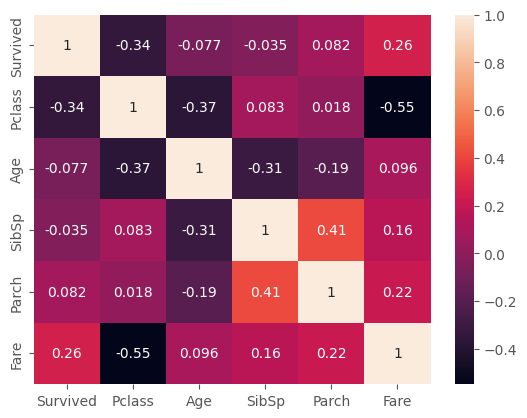

In [ ]:
sns.heatmap(train.corr(numeric_only=True), annot=True)
plt.show()

Mapa de calor com os coeficientes de correlação entre as variáveis numéricas

#Limpeza de dados

In [ ]:
td = pd.concat([test, train], sort  = False)

Aqui juntamos os dados de treino e teste para aplicar as alterações em ambos ao mesmo tempo. Vale ressaltar que, como desejamos prever os exatos 418 dados de teste, alterações para excluir linhas deveriam ser feitas antes de juntar os dados e apenas nos dados de treino

In [ ]:
td.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

Primeiro excluímos as colunas determinadas a serem excluídas durante a análise exploratória

In [ ]:
td.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

Com os dados de treino e teste juntos, é possível obervar que a média e a mediana são valores bem distintos. Isso pode ocorrer, pois a média é influenciada por valores muito baixos ou muito altos. Assim, optamos por preencher o dado faltante com a mediana

In [ ]:
td.Fare.fillna(td.Fare.median(),  inplace = True)
td.Embarked.fillna('S',  inplace = True)

Como dito anteriormente, os valores nulos de Fare foram preenchidos com a mediana da coluna e os de Embarked com a moda

In [ ]:
td.Sex= td.Sex.apply(lambda x: 1 if x =="female" else 2)
td.Embarked = td.Embarked.apply(lambda x: 1 if x =="C" else ( 2 if x == "Q" else 3))

Para utilizar nos modelos, transformamos as variáveis Sex e Embarked em variáveis numéricas

In [ ]:
td['Family'] = td.SibSp + td.Parch

Na descrição do problema, é dito que SibSp é o número de irmãos/esposas(os) no navio e Parch o número de pais/filhos. Por isso, decidimos somar as duas variáveis para criar a variável família

In [ ]:
td.drop(['SibSp', 'Parch'], axis=1, inplace=True)


Então removemos as colunas SibSp e Parch

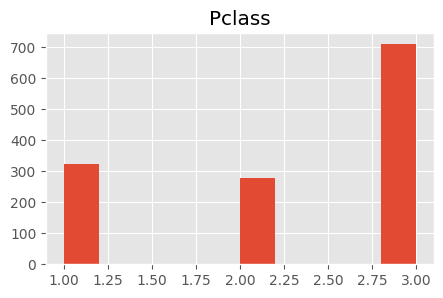

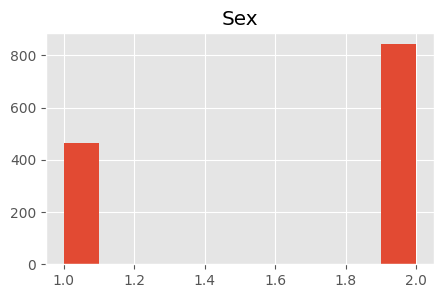

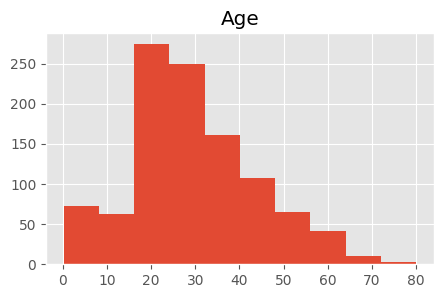

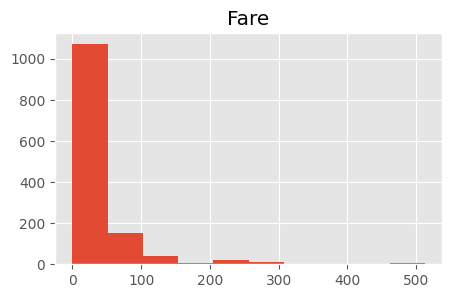

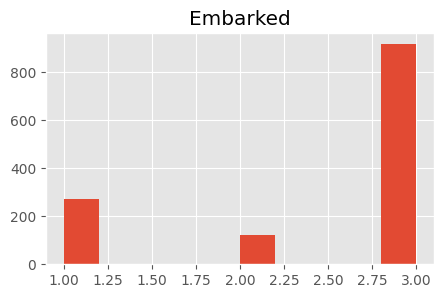

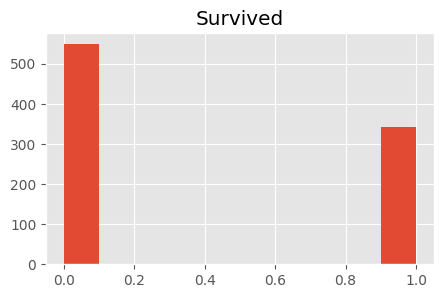

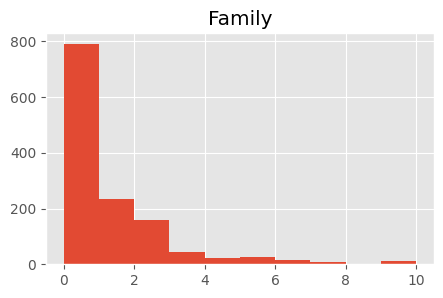

In [ ]:
for i in td.columns:
  plt.figure(figsize=(5,3))
  plt.hist(td[i])
  plt.title(i)
  plt.show()

Após todas as modificações, esses são os gráficos de distribuição dos dados em cada coluna

In [ ]:
td.isna().sum()

Pclass        0
Sex           0
Age         263
Fare          0
Embarked      0
Survived    418
Family        0
dtype: int64

Agora só existem valores nulos nas colunas Age e Survived (que são os valores que devemos prever)



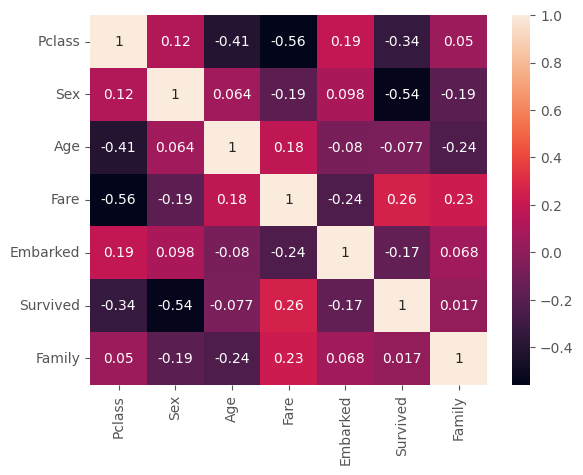

In [ ]:
sns.heatmap(td.corr(numeric_only=True), annot=True)
plt.show()

Pelo mapa de calor, Age tem -0,41 de correlação com Pclass. Assim, vamos utilizá-la para separar os passageiros em grupos e utilzar a mediana deles para preencher as idades faltantes

In [ ]:
grp = td.groupby(['Sex', 'Pclass'], group_keys=False)
td.Age = grp.Age.apply(lambda x: x.fillna(x.median()))

#Caso algum passageiro ainda esteja sem a idade preenchida, utilizamos a mediana geral
td.Age.fillna(td.Age.median(), inplace = True)

In [ ]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   int64  
 2   Age       1309 non-null   float64
 3   Fare      1309 non-null   float64
 4   Embarked  1309 non-null   int64  
 5   Survived  891 non-null    float64
 6   Family    1309 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 81.8 KB


Por fim, após a limpeza de dados, temos 7 colunas (todas numéricas) e dados nulos apenas na coluna Survived, que serão os dados que vamos prever

#Predição

In [ ]:
#Dados para prever
to_predict = td[td.Survived.isnull()]
to_predict = to_predict.drop(['Survived'], axis = 1)
print(to_predict.shape)

#Dados de treino
train = td
train = train.dropna()
y = train['Survived']
x  = train.drop(['Survived'], axis = 1)
train.shape

(418, 6)


(891, 7)

Aqui separamos os dados entre dados de treino e dados de teste, sendo que os dados de treino foram divididos entre x e y, onde x são as variáveis de entrada e y a variável de saída

#Utilizando GaussianNB

Acurácia GaussianNB: 72.63%
Acurácia GaussianNB com validação cruzada: 81.03


Text(0.5, 1.05, 'Matriz de confusão para NB')

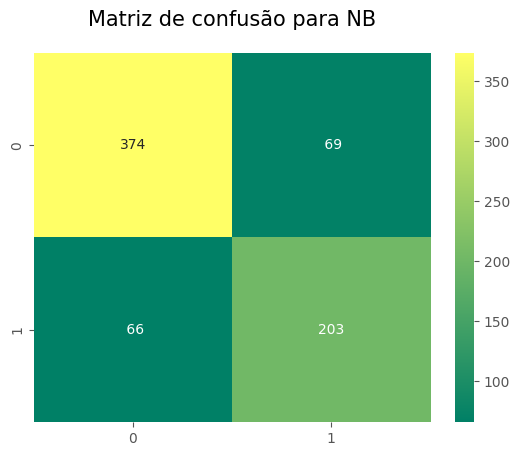

In [ ]:
nb = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
nb.fit(x_train,  np.ravel(y_train))
print("Acurácia GaussianNB: " + repr(round(nb.score(x_test, y_test) * 100, 2)) + "%")
result_nb = cross_val_score(nb, x_train, y_train, cv=10, scoring='accuracy')
print('Acurácia GaussianNB com validação cruzada:',round(result_nb.mean()*100,2))
y_pred = cross_val_predict(nb, x_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred), annot=True, fmt='3.0f', cmap="summer")
plt.title('Matriz de confusão para NB', y=1.05, size=15)

#Utilizando Random Forest

Acurácia Random Forest: 83.8%
Acurácia Random Forest com validação cruzada:: 82.18


Text(0.5, 1.05, 'Matriz de confusão para RF')

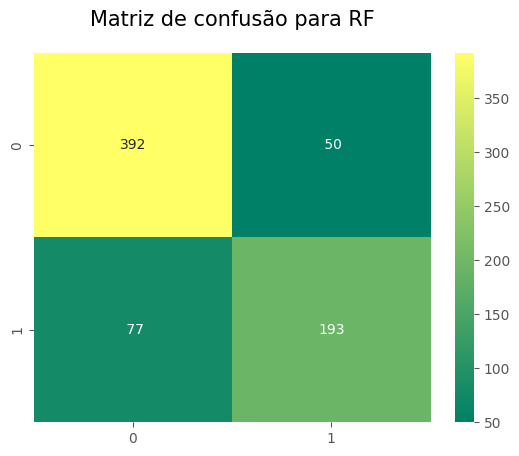

In [ ]:
rf = RandomForestClassifier(criterion='entropy',
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='sqrt',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1,)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rf.fit(x_train,  np.ravel(y_train))
print("Acurácia Random Forest: " + repr(round(rf.score(x_test, y_test) * 100, 2)) + "%")

result_rf = cross_val_score(rf, x_train, y_train, cv=10, scoring='accuracy')
print('Acurácia Random Forest com validação cruzada::',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(rf, x_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="summer")
plt.title('Matriz de confusão para RF', y=1.05, size=15)

Como o Random Forest obteve o melhor resultado, iremos utilizá-lo para prever os dados de teste

In [ ]:
rf.fit(x,  np.ravel(y))

result = rf.predict(to_predict)
submission = pd.DataFrame({'PassengerId':to_predict.index, 'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
nome_arq = 'Titanic Predictions.csv'
submission.to_csv(nome_arq, index=False)
print('Saved file: ' + nome_arq)

(418, 2)
Saved file: Titanic Predictions.csv


# Predição utilizando Modelo de Regressão Logística


In [ ]:
import statsmodels.api as sm

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int64  
 5   Survived  891 non-null    float64
 6   Family    891 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 55.7 KB


In [ ]:
preditoras = train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']]
resposta = train['Survived']

In [ ]:
glm_binom = sm.GLM(resposta, preditoras, family= sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -478.40
Date:                Thu, 14 Dec 2023   Deviance:                       956.80
Time:                        15:44:30   Pearson chi2:                     986.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2274
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.2085      0.098      2.121      0.0

In [ ]:
ajustado = res.predict(preditoras)
ajustado

PassengerId
1      0.177876
2      0.645275
3      0.600342
4      0.710637
5      0.227316
         ...   
887    0.201683
888    0.609968
889    0.537287
890    0.125595
891    0.164927
Length: 891, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
predito = res.predict(x_test)
predito

PassengerId
597    0.687726
289    0.219640
691    0.323277
157    0.490119
653    0.211559
         ...   
226    0.216316
684    0.136115
116    0.209616
153    0.254288
178    0.475243
Length: 179, dtype: float64

In [ ]:
logreg = LogisticRegression(solver= 'liblinear', random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred

array([1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
logreg.predict_proba(x_test)[:,0]

array([0.25698418, 0.82124705, 0.62032461, 0.35204864, 0.84789555,
       0.82124705, 0.50923835, 0.34626042, 0.88265682, 0.86080132,
       0.77533388, 0.65860391, 0.72939347, 0.87512389, 0.10592654,
       0.85901098, 0.79151119, 0.38024421, 0.83896157, 0.8685767 ,
       0.39521055, 0.85323935, 0.85438217, 0.39211843, 0.35870874,
       0.78677829, 0.95193637, 0.84519856, 0.83185402, 0.28876853,
       0.65063444, 0.35972239, 0.88057225, 0.3668384 , 0.38530829,
       0.39928882, 0.86745426, 0.86311522, 0.86018542, 0.38512268,
       0.12861236, 0.66386605, 0.40015084, 0.36684432, 0.78677829,
       0.08983486, 0.72124696, 0.41280888, 0.30592946, 0.70385569,
       0.4913866 , 0.26196837, 0.86036464, 0.9062728 , 0.91773949,
       0.83984856, 0.11365534, 0.70753202, 0.08917863, 0.83224443,
       0.59738287, 0.40443715, 0.86973844, 0.86859792, 0.2152944 ,
       0.57765141, 0.27830238, 0.95521513, 0.07537853, 0.86080132,
       0.87147195, 0.59556509, 0.10865794, 0.88574664, 0.42752

In [ ]:
logreg.predict_proba(x_test)[:,1]

array([0.74301582, 0.17875295, 0.37967539, 0.64795136, 0.15210445,
       0.17875295, 0.49076165, 0.65373958, 0.11734318, 0.13919868,
       0.22466612, 0.34139609, 0.27060653, 0.12487611, 0.89407346,
       0.14098902, 0.20848881, 0.61975579, 0.16103843, 0.1314233 ,
       0.60478945, 0.14676065, 0.14561783, 0.60788157, 0.64129126,
       0.21322171, 0.04806363, 0.15480144, 0.16814598, 0.71123147,
       0.34936556, 0.64027761, 0.11942775, 0.6331616 , 0.61469171,
       0.60071118, 0.13254574, 0.13688478, 0.13981458, 0.61487732,
       0.87138764, 0.33613395, 0.59984916, 0.63315568, 0.21322171,
       0.91016514, 0.27875304, 0.58719112, 0.69407054, 0.29614431,
       0.5086134 , 0.73803163, 0.13963536, 0.0937272 , 0.08226051,
       0.16015144, 0.88634466, 0.29246798, 0.91082137, 0.16775557,
       0.40261713, 0.59556285, 0.13026156, 0.13140208, 0.7847056 ,
       0.42234859, 0.72169762, 0.04478487, 0.92462147, 0.13919868,
       0.12852805, 0.40443491, 0.89134206, 0.11425336, 0.57247

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8212


In [ ]:
y_pred_train = logreg.predict(x_train)
y_pred_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8034


In [ ]:
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.8034
Test set score: 0.8212


In [ ]:
y_test.value_counts()

0.0    101
1.0     78
Name: Survived, dtype: int64

In [ ]:
null_accuracy = (112/(112+67))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6257


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[92,  9],
       [23, 55]])

Text(0.5, 427.9555555555555, 'Predicted label')

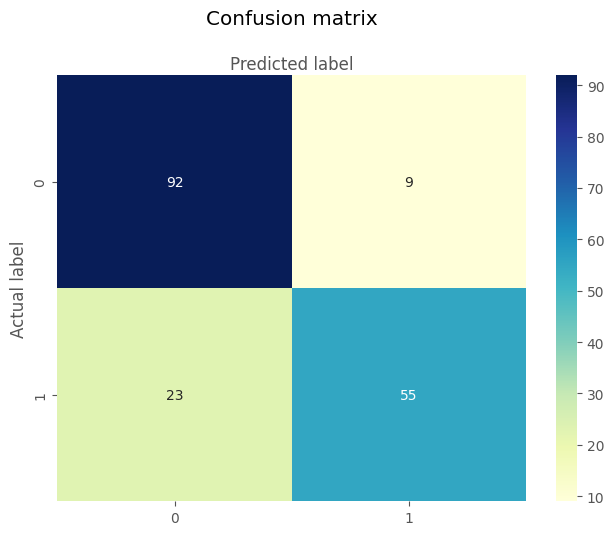

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       101
         1.0       0.86      0.71      0.77        78

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179



In [ ]:
logreg.fit(x,  np.ravel(y))

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
result = logreg.predict(to_predict)
submission = pd.DataFrame({'PassengerId':to_predict.index, 'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
nome_arq = 'Titanic Predictions.csv'
submission.to_csv(nome_arq, index=False)
print('Saved file: ' + nome_arq)

(418, 2)
Saved file: Titanic Predictions.csv
